#### 00. Importing Libraries

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
                            confusion_matrix,
                            accuracy_score,
                            f1_score,
                            precision_score,
                            recall_score
                            )
warnings.filterwarnings('ignore')

In [42]:
seed = 42
np.random.seed(seed)

#### Quick Overview of Logisic Regression

Y_hat(Z) = 1 / 1 (1 + exp(-Z))

P(Y = 1 | X) = (Y_hat(Z))

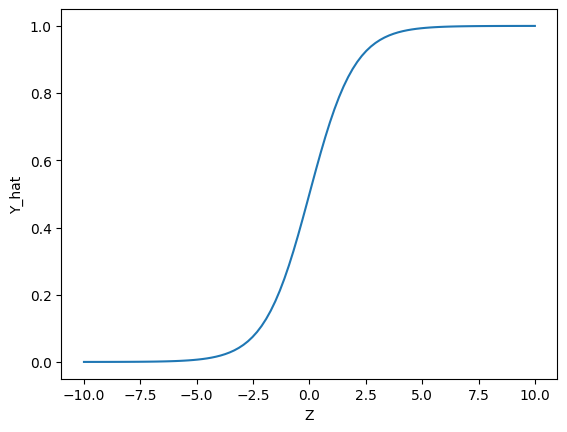

In [43]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

X_linespace = np.linspace(-10, 10, 100)
Y_hat = sigmoid(X_linespace)

plt.plot(X_linespace, Y_hat)
plt.xlabel('Z')
plt.ylabel('Y_hat')
plt.show()

#### 01. Loading the Data

In [44]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

#### 02. Model Training

In [45]:
model_lr =LogisticRegression(
                            random_state = 42,
                            max_iter = 1000              
                            )

model_lr.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


#### Inference

In [46]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

Y_proba_train = model_lr.predict_proba(X_train)
Y_proba_test = model_lr.predict_proba(X_test)

In [47]:
Y_hat_train

array([0, 0, 0, ..., 1, 1, 0], shape=(12712,))

In [48]:
Y_proba_train

array([[0.9239779 , 0.0760221 ],
       [0.6367169 , 0.3632831 ],
       [0.75965271, 0.24034729],
       ...,
       [0.27245676, 0.72754324],
       [0.43561915, 0.56438085],
       [0.58928312, 0.41071688]], shape=(12712, 2))

#### Evaluation

In [49]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1_score = f1_score(Y_test, Y_hat_test)

In [50]:
print(f"accuracy : {accuracy}")
print(f"precision : {precision}")
print(f"recall : {recall}")
print(f"f1_score : {f1_score}")


accuracy : 0.7125
precision : 0.37
recall : 0.6590330788804071
f1_score : 0.4739249771271729


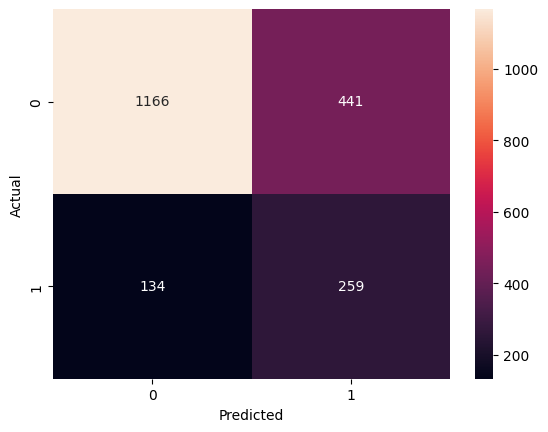

In [51]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()